In [1]:
import torch

In [2]:
from transformers import pipeline

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [13]:
import json
import os
import numpy as np
import pandas as pd
import plotly.express as px

In [5]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")


c:\anaconda\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
def process_sentences(json_file_path, max_length=512):
    processed_sentences = []
    
    # read json file
    with open(json_file_path, 'r') as file:
        sentences_data = json.load(file)
    
    # iterate each sentence
    for entry in sentences_data:
        sentence = entry['sentence']
        
        # tokenize and truncate
        tokens = tokenizer(sentence, truncation=True, max_length=512, return_tensors="pt", padding=True)
        
        # convert to text
        truncated_sentence = tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True)
        
        # save processed sentence
        processed_sentences.append(truncated_sentence)
    
    return processed_sentences

In [7]:
classify = pipeline(
    task="sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    top_k=None
)

In [16]:
text = "All around the rim of China the nations of non-Communist Asia are building a new prosperity and developing a new cohesiveness, which together suggest that they should be able to play far more assertive roles in their own defense.\n The Soviet drive for strategic supremacy — which the Soviets already have very nearly achieved, while the United States has passively watched — is deeply troubling and seriously threatening"

In [17]:
text2 = "Since China joined the WTO, Americans have witnessed the closure of more than 50,000 factories and the loss of tens of millions of jobs"

In [18]:
scores = classify(text)
print(scores)

[[{'label': '4 stars', 'score': 0.34373730421066284}, {'label': '5 stars', 'score': 0.2400761842727661}, {'label': '3 stars', 'score': 0.17142046988010406}, {'label': '2 stars', 'score': 0.1672779768705368}, {'label': '1 star', 'score': 0.07748813927173615}]]


In [19]:
scores2 = classify(text2)
print(scores2[0][0]['label'])


1 star


In [20]:
print(scores[0][0]['label'].split(' ')[0])


4


In [35]:
# with open('./speech_json/37_nixon_speech.json', 'r') as file:
#     nixon_speech = json.load(file)

# with open('./speech_json/38_ford_speech.json', 'r') as file:
#     ford_speech = json.load(file)

# with open('./speech_json/39_carter_speech.json', 'r') as file:
#     carter_speech = json.load(file)

# with open('./speech_json/40_reagan_speech.json', 'r') as file:
#     reagan_speech = json.load(file)

# with open('./speech_json/41_herbertbush_speech.json', 'r') as file:
#     herbertbush_speech = json.load(file)

# with open('./speech_json/42_clinton_speech.json', 'r') as file:
#     clinton_speech = json.load(file)

# with open('./speech_json/43_walkerbush_speech.json', 'r') as file:
#     walkerbush_speech = json.load(file)

# with open('./speech_json/44_obama_speech.json', 'r') as file:
#     obama_speech = json.load(file)

# with open('./speech_json/45_trump_speech.json', 'r') as file:
#     trump_speech = json.load(file)

# with open('./speech_json/46_biden_speech.json', 'r') as file:
#     biden_speech = json.load(file)

# with open('./speech_json/47_vicepresident_biden_speech.json', 'r') as file:
#     vicepresident_biden_speech = json.load(file)



In [8]:
with open('./speech_json/deduplicated_canada.json', 'r') as file:
    canada_speech = json.load(file)

In [9]:
def calculate_scores(speech_file, output_file):
    results = []

    for entry in speech_file:
        sentence = entry['sentence']
        date = entry['date']
        tokens = tokenizer(sentence, truncation=True, max_length=512, return_tensors="pt", padding=True)
        truncated_sentence = tokenizer.decode(tokens['input_ids'][0], skip_special_tokens=True)
        result = classify(truncated_sentence)
        sentiment_score = result[0][0]['label'].split(' ')[0]

        # Collect sentences with their scores and dates
        results.append({
            "date": date,
            "sentiment_score": sentiment_score,
            "sentence": sentence
        })

    # Save results to a JSON file
    with open(output_file, 'w') as outfile:
        json.dump(results, outfile, indent=4)

    return results

In [39]:
# nixon_results = calculate_scores(nixon_speech, 'nixon_sentiment_scores.json')
# ford_results = calculate_scores(ford_speech, 'ford_sentiment_scores.json')
# carter_results = calculate_scores(carter_speech, 'carter_sentiment_scores.json')
# reagan_results = calculate_scores(reagan_speech, 'reagan_sentiment_scores.json')
# herbertbush_results = calculate_scores(herbertbush_speech, 'herbertbush_sentiment_scores.json')
# clinton_results = calculate_scores(clinton_speech, 'clinton_sentiment_scores.json')
# walkerbush_results = calculate_scores(walkerbush_speech, 'walkerbush_sentiment_scores.json')
# obama_results = calculate_scores(obama_speech, 'obama_sentiment_scores.json')
# trump_results = calculate_scores(trump_speech, 'trump_sentiment_scores.json')
# biden_results = calculate_scores(biden_speech, 'biden_sentiment_scores.json')
# vicepresident_biden_results = calculate_scores(vicepresident_biden_speech, 'vicepresident_biden_sentiment_scores.json')


In [10]:
canada_sentiment_scores = calculate_scores(canada_speech, 'canada_sentiment_scores.json')

KeyboardInterrupt: 

In [40]:
# with open('./sentiment_scores_json/nixon_sentiment_scores.json', 'r') as file:
#     nixon_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/ford_sentiment_scores.json', 'r') as file:
#     ford_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/carter_sentiment_scores.json', 'r') as file:
#     carter_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/reagan_sentiment_scores.json', 'r') as file:
#     reagan_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/herbertbush_sentiment_scores.json', 'r') as file:
#     herbertbush_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/clinton_sentiment_scores.json', 'r') as file:
#     clinton_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/walkerbush_sentiment_scores.json', 'r') as file:
#     walkerbush_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/obama_sentiment_scores.json', 'r') as file:
#     obama_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/trump_sentiment_scores.json', 'r') as file:
#     trump_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/biden_sentiment_scores.json', 'r') as file:
#     biden_sentiment_scores = json.load(file)

# with open('./sentiment_scores_json/vicepresident_biden_sentiment_scores.json', 'r') as file:
#     vicepresident_biden_sentiment_scores = json.load(file)


In [11]:
def sentiment_statistics(scores, presidentname):

    sentiment_scores = [int(score['sentiment_score']) for score in scores]

    if not sentiment_scores:
        return None, None, None
    
    average_sentiment_score = np.mean(sentiment_scores)
    median_sentiment_score = np.median(sentiment_scores)
    std_dev_sentiment_score = np.std(sentiment_scores)

    print(f"president_name: {presidentname}")
    print(f"average_sentiment_score: {average_sentiment_score:.3f}")
    print(f"median_sentiment_score: {median_sentiment_score:.3f}")
    print(f"std_dev_sentiment_score: {std_dev_sentiment_score:.3f}")

    results = {
        "president_name": presidentname,
        "average_sentiment_score": average_sentiment_score,
        "median_sentiment_score": median_sentiment_score,
        "std_dev_sentiment_score": std_dev_sentiment_score,

    }

    # Save results to a JSON file
    with open('sentiment_statistics.json', 'a') as outfile:
        json.dump(results, outfile, indent=4)
    
    return average_sentiment_score, median_sentiment_score, std_dev_sentiment_score



In [60]:
# nixon_sentiment_statistics = sentiment_statistics(nixon_sentiment_scores, "nixon")
# ford_sentiment_statistics = sentiment_statistics(ford_sentiment_scores, "ford")
# carter_sentiment_statistics = sentiment_statistics(carter_sentiment_scores, "carter")
# reagan_sentiment_statistics = sentiment_statistics(reagan_sentiment_scores, "reagan")
# herbertbush_sentiment_statistics = sentiment_statistics(herbertbush_sentiment_scores, "herbertbush")
# clinton_sentiment_statistics = sentiment_statistics(clinton_sentiment_scores, "clinton")
# walkerbush_sentiment_statistics = sentiment_statistics(walkerbush_sentiment_scores, "walkerbush")
# obama_sentiment_statistics = sentiment_statistics(obama_sentiment_scores, "obama")
# trump_sentiment_statistics = sentiment_statistics(trump_sentiment_scores, "trump")
#biden_sentiment_statistics = sentiment_statistics(biden_sentiment_scores, "biden")

In [15]:
import matplotlib.pyplot as plt

def visualize_sentiment_scores(sentiment_statistics):
    presidents = [entry['president_name'] for entry in sentiment_statistics]
    average_sentiment_scores = [entry['average_sentiment_score'] for entry in sentiment_statistics]
    median_sentiment_scores = [entry['median_sentiment_score'] for entry in sentiment_statistics]
    

    plt.figure(figsize=(14, 7))

    # Plot average and median sentiment scores
    plt.subplot(1, 2, 1)
    plt.plot(presidents, average_sentiment_scores, marker='o', label='Average Sentiment Score')
    plt.plot(presidents, median_sentiment_scores, marker='o', label='Median Sentiment Score')
    plt.xlabel('President')
    plt.ylabel('Score')
    plt.title('Sentiment Scores')
    plt.legend()
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [16]:
with open('./sentiment_statistics.json', 'r') as file:
    sentiment_statistics = json.load(file)

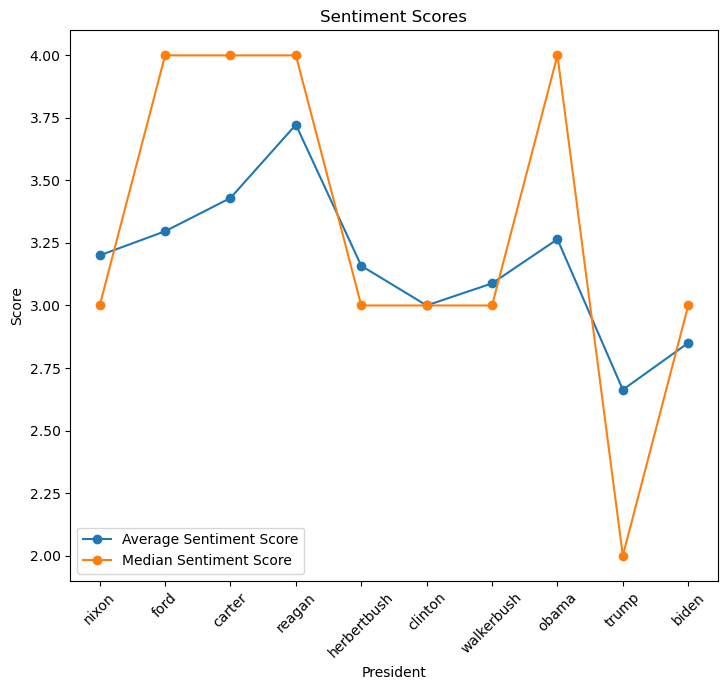

In [17]:
visualize_sentiment_scores(sentiment_statistics)